# 8. Prescribe Traction
In this notebook we will show example of prescribing traction type boundary condition by using point source.

In [1]:
using ViscousFlow
using Plots

## Problem specification
Take $Re=100$ for example and discretize:

In [2]:
Re = 100

100

In [3]:
Δx,Δt = setstepsizes(Re,gridRe=4)
xlim, ylim = (-6,6),(-2,2)

((-6, 6), (-2, 2))

## Create channel
Two plates of length 30 centered at (0,0) are used to represent the wall of the pipe. All bodies must be put into a bodylist to create the Navier Stokes system.

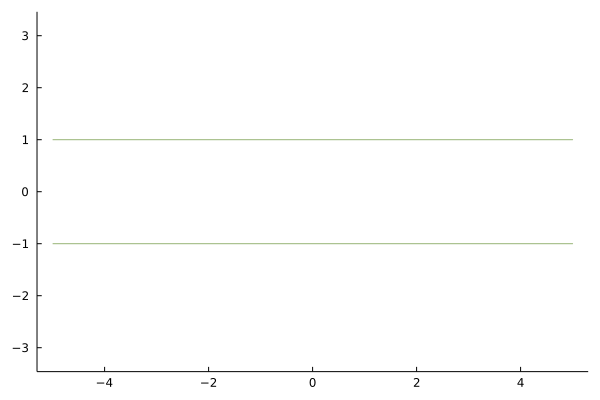

In [4]:
channel = BodyList()
tl = RigidTransformList()
push!(channel,Plate(10,1.5Δx)); push!(tl,RigidTransform((0.0,1.0),0.));
push!(channel,Plate(10,1.5Δx)); push!(tl,RigidTransform((0.0,-1.0),0.));
tl(channel)
plot(channel)

## Inlet/Outlet boundary
The traction line source functions will set a specified traction strength onto a sets of specified location, so here, we use two veritcal plates with length of 2 (gap of between the wall) to represent the inlet and outlet. LineSourceParams( ) is used to collect the location of a body.

In [5]:
inlet = Plate(2.0,1.5Δx)
T = RigidTransform((-5.0,0.0),π/2)
T(inlet)
τin = LineSourceParams(inlet)
TractionStrength_in = VectorData(collect(inlet))
fill!(TractionStrength_in.u,-1.0)
fill!(TractionStrength_in.v,0.0)
nothing #hide

In [6]:
outlet = Plate(2.0,1.5Δx)
T = RigidTransform((5.0,0.0),π/2)
T(outlet)
τout = LineSourceParams(outlet)
TractionStrength_out = VectorData(collect(outlet))
fill!(TractionStrength_out.u,0.0)
fill!(TractionStrength_out.v,0.0)
nothing #hide

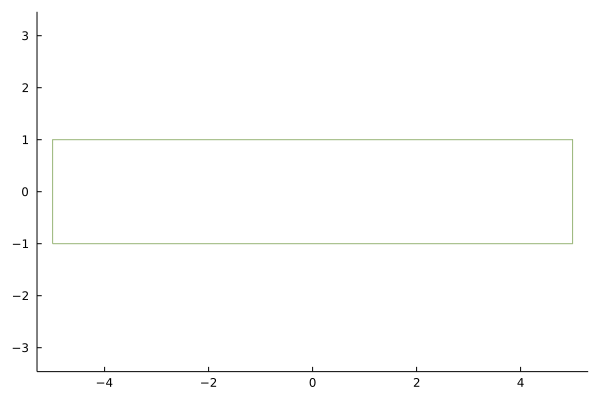

In [7]:
plot!(inlet)
plot!(outlet)

## Create N-S system
Note the order of $\tau$ in $\tau$_bc is important for prescribing their strength

In [8]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,channel,τ_bc=[τin,τout]);

Initialize and Integrate

In [9]:
u0 = newstate(sys)
tspan = (0.0,12.0)
integrator = init(u0,tspan,sys);

## Set traction strength for inlet and outlet
Outlet is skipped because it is 0 by default.

In [10]:
set_linesource_strength!(sys.τ_bc[1],TractionStrength_in);

## Solve

In [11]:
step!(integrator,12.0)

## Examine
Plot the vorticity and streamlines

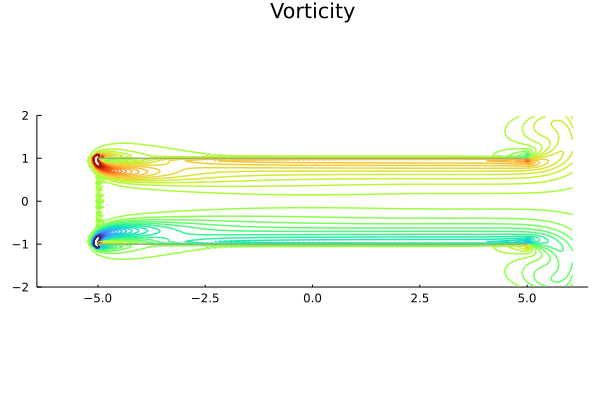

In [12]:
plot(vorticity(integrator),sys,title="Vorticity",clim=(-10,10),levels=range(-10,10,length=50),color=:turbo,linewidth=1.5,ylim=ylim,fillrange=nothing)

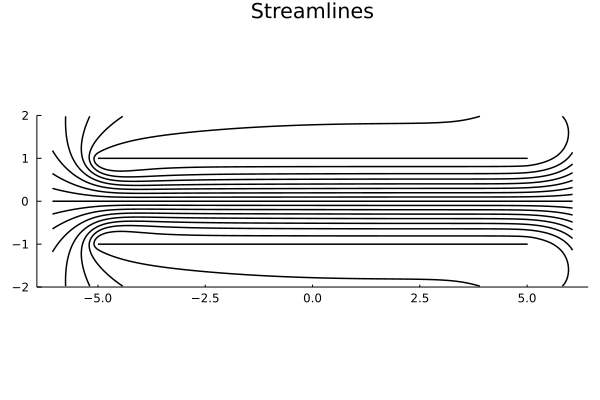

In [13]:
plot(streamfunction(integrator),sys,title="Streamlines",linewidth=1.5,levels=15,ylim=ylim,color=:Black,fillrange=nothing,linecolor=:black)

Make a movie:

┌ Info: Saved animation to 
└   fn = "/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_nvMZhL.gif"


Plots.AnimatedGif("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_nvMZhL.gif")
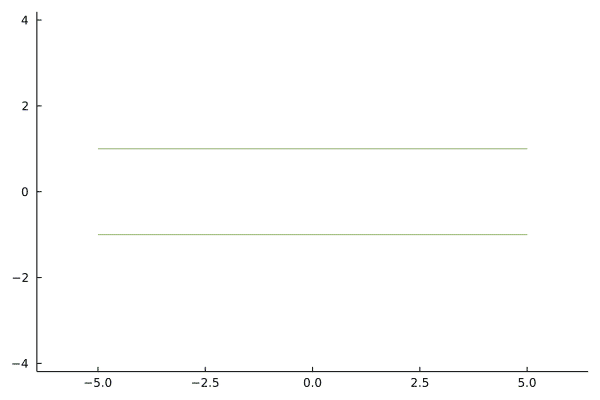

In [14]:
sol = integrator.sol;
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30),color=:turbo)
end every 5

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*